In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
from mpmath import mp
import math
import random

psd = pd.DataFrame
from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [2]:
def single_lik(mu):
   y= tfd.MultivariateNormalFullCovariance(mu,sigma_obs)
   return y

In [3]:
def prior():
    return tfd.MultivariateNormalFullCovariance(mu0,sigma0)

In [4]:
def proposal(theta):
  return tfd.MultivariateNormalFullCovariance(theta,cov)

In [6]:
def K_h(u,H):
    return 1/(np.sqrt(2*math.pi))*pow(np.linalg.det(H), -1/2)*np.exp(-1/2*u@np.linalg.inv(H)@u.T)

## restituisce uno scalare e dovrebbe essere giusto

In [ ]:
## prova e restituisce uno scalare
## u= np.array([2,1])
## H= np.array([[1,0],[0,1]])
## K_h(u,H)

0.032747176537766653

In [ ]:
## def S1(y):
## quantiles=[]
##  for i in range(9):
##      quantiles.append(np.quantile(y,0.1+0.1*i))         #quantili 0,1 0,2 0,3 0,4 0,5 0,6 0,7 0,8 0,9
##  return quantiles

## per ora ho fatto con S2

In [8]:
def S2(y):
  return np.mean(y,axis=0)


In [ ]:
## mu_obs = np.array ([[1,4]])
## sigma_obs=np.array([[1,0.5],[0.5,1]])
## y_obs=tfd.MultivariateNormalFullCovariance(mu_obs,sigma_obs).sample(1000)
## np.mean(y_obs,axis=0)

## prova per vedere se funziona

array([[0.97364184, 3.99175869]])

In [12]:
def abc_algo (N, S, y_obs, H):
    s_obs = S(y_obs)
    theta=[]
    s = []
    y = []
    theta_0 = prior().sample()
    y_0 = single_lik(theta_0).sample() 
    s_0 = S(y_0)
    
    
    while ((K_h(np.array(s_0)-np.array(s_obs),H)[0]<=np.array([0,0])[0]) and ( K_h(np.array(s_0)-np.array(s_obs),H)[1]<=np.array([0,0])[1])):
        print(K_h(s_0-s_obs,H))
        theta_0 = prior().sample()
        y_0 = single_lik(theta_0).sample() 
        s_0 = S(y_0)
   
      
    theta.append(theta_0)
    s.append(s_0)
    y.append(y_0)
    theta_old = theta_0
    s_old = s_0
    y_old = y_0

    for i in range(N):
        theta_current = proposal(theta_old).sample()
        y_current = single_lik(theta_current).sample(1000)
        #y.append(y_current)
        s_current = S(y_current)
               
        prob = min([1.,(K_h(np.array(s_current) - np.array(s_obs),H)*prior().prob(theta_current)*proposal(theta_old).prob(theta_current))/(
             K_h(np.array(s_old-s_obs),H)*prior().prob(theta_old)*proposal(theta_current).prob(theta_old))])
        ## u = np.random.uniform(low=0,high=1,size=2)
        u = tfd.Uniform(0,1).sample()
        if u < prob:
              theta_i = theta_current
              s_i = s_current
        else: 
              theta_i = theta_old
              s_i = s_old
              #y.pop()
              #y.append(y_old)

        theta_old = theta_i
        s_old = s_i
        
        theta.append(theta_i)
        s.append(s_i)
        
    return  theta

In [11]:
##VARIABILI:
cov= np.array([[1,0],[0,1]])
H= np.array([[1,0],[0,1]])
mu0 = np.array ([[3,6]])
sigma0 = np.array([[3,0.7],[0.7,3]])
n = 1000
mu_obs = np.array ([[1,4]])
sigma_obs=np.array([[1,0.5],[0.5,1]])
y_obs=tfd.MultivariateNormalFullCovariance(mu_obs,sigma_obs).sample(1000)

In [13]:
prova = abc_algo (n, S2, y_obs, H) 

In [14]:
prova

[array([[4.37867644, 5.64092932]]),
 array([[4.37867644, 5.64092932]]),
 array([[4.37867644, 5.64092932]]),
 array([[2.82435855, 5.03584624]]),
 array([[2.71770755, 5.48437751]]),
 array([[1.7435878, 5.6842331]]),
 array([[1.7435878, 5.6842331]]),
 array([[1.7435878, 5.6842331]]),
 array([[1.7435878, 5.6842331]]),
 array([[2.13820934, 4.57546967]]),
 array([[0.9240164 , 5.48765689]]),
 array([[0.9240164 , 5.48765689]]),
 array([[2.70265351, 5.14990338]]),
 array([[3.19647976, 5.06180936]]),
 array([[3.19647976, 5.06180936]]),
 array([[2.82098266, 5.43680682]]),
 array([[2.69997378, 4.73392939]]),
 array([[3.05276108, 4.20787319]]),
 array([[3.05276108, 4.20787319]]),
 array([[2.44602066, 3.14650471]]),
 array([[2.44602066, 3.14650471]]),
 array([[2.44602066, 3.14650471]]),
 array([[1.65987057, 3.42655801]]),
 array([[1.65987057, 3.42655801]]),
 array([[1.65987057, 3.42655801]]),
 array([[0.3253267, 3.7731297]]),
 array([[0.3253267, 3.7731297]]),
 array([[0.89555491, 4.92535466]]),
 arr

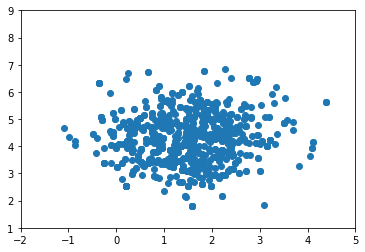

In [17]:
prova=np.asarray(prova)
prova=np.reshape(prova,[1001,2])
prova
prova.shape
plt.scatter(prova[:,0],prova[:,1])
plt.axis([-2,5,1,9])
plt.show()